In [2]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets.samples_generator import make_blobs
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [3]:
df = pd.read_csv("Amazon.csv", encoding='latin-1')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    10000 non-null  object
 1   label   10000 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB


In [4]:
np.random.seed(500)

Data cleaning 
* removing blank rows or data 
* change all the text to lower case 
* word tokenization 
* remove stop words 
* remove non alpha text 
* word lemmatization

In [5]:
# drop any possible null values
df.dropna(inplace=True)

In [6]:
# changing all to lower case
df = df.applymap(lambda s:s.lower() if type(s) == str else s)

In [7]:
#removing all non alphanumeric words 
df['text'] = df['text'].replace('[^a-zA-Z0-9 ]', '', regex=True)

In [8]:
# tokenization
df['text'] = [word_tokenize(i) for i in df['text']]

In [9]:
#removing stop words 
stop = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: [item for item in x if item not in stop])

In [10]:
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV


for index,entry in enumerate(df['text']):
    # Declaring Empty List to store the words that follow the rules for this step
    Final_words = []
    # Initializing WordNetLemmatizer()
    word_Lemmatized = WordNetLemmatizer()
    # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
    for word, tag in pos_tag(entry):
        # Below condition is to check for Stop words and consider only alphabets
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    # The final processed set of words for each iteration will be stored in 'text_final'
    df.loc[index,'text_final'] = str(Final_words)

df['text'] = df['text_final']

Prepare train and test data sets 
* transforming categorical data of string type to numerical values 

In [11]:
X = df['text']
y = df['label']

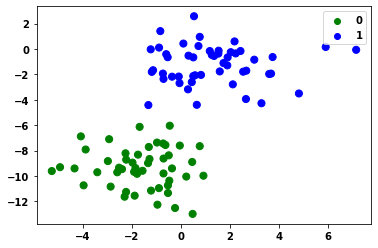

In [12]:
X,y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
colors=np.array(["green", "blue"])
plt.scatter(X[:, 0], X[:, 1], c=colors[y], s=50)
for label, c in enumerate(colors):
    plt.scatter([], [], c=c, label=str(label))
plt.legend();

In [13]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(df['text'],df['label'],test_size=0.3)

In [14]:
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)
print(Train_Y.shape)

(7000,)


In [15]:
vectorizer = CountVectorizer()
Train_X_ = vectorizer.fit_transform(Train_X)
Test_X_ = vectorizer.transform(Test_X)
print(Train_X_.shape)

(7000, 27048)


Deploying a model

In [16]:
#df.head()
df.drop(['text_final'], axis=1 ,inplace=True)

In [17]:
# fit the training dataset on the NB classifier
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_,Train_Y)
# predict the labels on validation dataset
predictions_NB = Naive.predict(Test_X_)
# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, Test_Y)*100)

Naive Bayes Accuracy Score ->  82.26666666666667


In [18]:
print(classification_report(Test_Y,predictions_NB))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1538
           1       0.84      0.79      0.81      1462

    accuracy                           0.82      3000
   macro avg       0.82      0.82      0.82      3000
weighted avg       0.82      0.82      0.82      3000



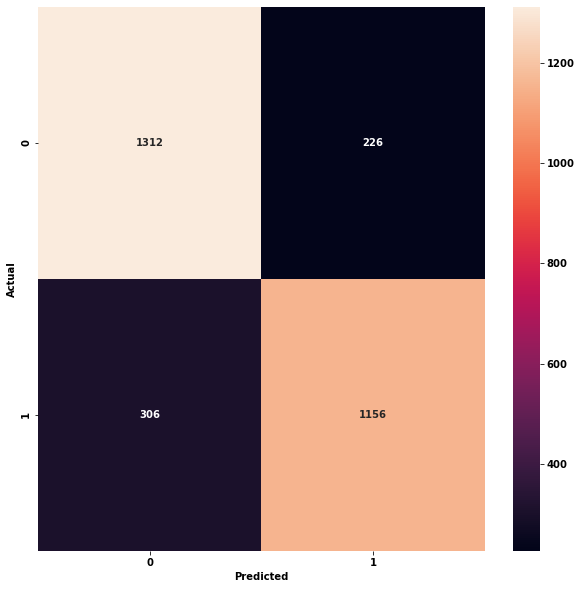

In [30]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(Test_Y, predictions_NB)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [20]:
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_,Train_Y)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)

SVM Accuracy Score ->  82.16666666666667


In [25]:
from sklearn import metrics
print(metrics.classification_report(Test_Y,predictions_SVM, target_names = df['label'].unique()))

              precision    recall  f1-score   support

 __label__2        0.83      0.83      0.83      1538
 __label__1        0.82      0.82      0.82      1462

    accuracy                           0.82      3000
   macro avg       0.82      0.82      0.82      3000
weighted avg       0.82      0.82      0.82      3000



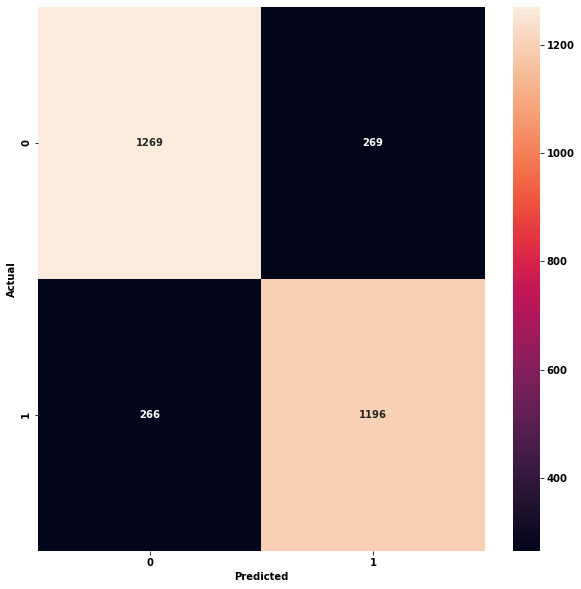

In [29]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(Test_Y, predictions_SVM)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()